In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

In [3]:
df = pd.read_csv("DATASET/NMIS_Health_Dataset.csv")

In [4]:
df.head()

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,True,Health Post,public,True,False,True,False,True,False,False,False,True,False,True,1.0,0.0,0.0,0.0,6.543408,9.084703
1,True,Primary Health Centre (PHC),private,True,True,True,False,True,False,True,True,True,False,True,4.0,1.0,1.0,1.0,9.007209,7.677808
2,True,Basic Health Centre / Primary Health Clinic,public,True,True,True,True,True,True,True,True,True,True,True,2.0,4.0,11.0,2.0,5.129700,7.159200
3,True,Primary Health Centre (PHC),public,False,False,False,False,True,True,False,False,True,True,True,2.0,0.0,0.0,0.0,5.463300,8.146400
4,True,Health Post,public,False,False,False,False,True,False,False,False,True,True,True,0.0,0.0,0.0,0.0,5.504000,8.025100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34139 entries, 0 to 34138
Data columns (total 20 columns):
maternal_health_delivery_services    33451 non-null object
facility_type_display                34024 non-null object
management                           29385 non-null object
emergency_transport                  34139 non-null bool
skilled_birth_attendant              33255 non-null object
phcn_electricity                     29781 non-null object
c_section_yn                         33578 non-null object
child_health_measles_immun_calc      29351 non-null object
improved_water_supply                29715 non-null object
improved_sanitation                  34071 non-null object
vaccines_fridge_freezer              29285 non-null object
antenatal_care_yn                    33473 non-null object
family_planning_yn                   33385 non-null object
malaria_treatment_artemisinin        33476 non-null object
num_chews_fulltime                   33705 non-null float64
num_nur

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26731 entries, 0 to 34138
Data columns (total 20 columns):
maternal_health_delivery_services    26731 non-null object
facility_type_display                26731 non-null object
management                           26731 non-null object
emergency_transport                  26731 non-null bool
skilled_birth_attendant              26731 non-null object
phcn_electricity                     26731 non-null object
c_section_yn                         26731 non-null object
child_health_measles_immun_calc      26731 non-null object
improved_water_supply                26731 non-null object
improved_sanitation                  26731 non-null object
vaccines_fridge_freezer              26731 non-null object
antenatal_care_yn                    26731 non-null object
family_planning_yn                   26731 non-null object
malaria_treatment_artemisinin        26731 non-null object
num_chews_fulltime                   26731 non-null float64
num_nur

In [8]:
new = pd.get_dummies(df['management'],'mg')
df = pd.concat([df,new], axis=1)
df = df.drop(['management'], axis=1)

In [9]:
df.head()

,maternal_health_delivery_services,facility_type_display,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,...,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude,mg_dk,mg_faith_based,mg_private,mg_public
0,True,Health Post,True,False,True,False,True,False,False,False,...,1.0,0.0,0.0,0.0,6.543408,9.084703,0,0,0,1
1,True,Primary Health Centre (PHC),True,True,True,False,True,False,True,True,...,4.0,1.0,1.0,1.0,9.007209,7.677808,0,0,1,0
2,True,Basic Health Centre / Primary Health Clinic,True,True,True,True,True,True,True,True,...,2.0,4.0,11.0,2.0,5.129700,7.159200,0,0,0,1
3,True,Primary Health Centre (PHC),False,False,False,False,True,True,False,False,...,2.0,0.0,0.0,0.0,5.463300,8.146400,0,0,0,1
4,True,Health Post,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,5.504000,8.025100,0,0,0,1


In [230]:

pd.unique(df['facility_type_display'])

array(['Health Post', 'Primary Health Centre (PHC)',
       'Basic Health Centre / Primary Health Clinic',
       'Specialist Hospital', 'Dispensary', 'General Hospital',
       "Information not available / Don't know",
       'Basic Health Centre or Primary Health Clinic',
       'Primary Health Center', 'District / General Hospital', 'Clinic',
       'Teaching / Specialist Hospital', 'Other', 'Private Facility',
       'none'], dtype=object)

In [11]:
df = df.replace([True,False],[1,0])

In [12]:
df.head()

,maternal_health_delivery_services,facility_type_display,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,...,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude,mg_dk,mg_faith_based,mg_private,mg_public
0,1,Health Post,1,0,1,0,1,0,0,0,...,1.0,0.0,0.0,0.0,6.543408,9.084703,0,0,0,1
1,1,Primary Health Centre (PHC),1,1,1,0,1,0,1,1,...,4.0,1.0,1.0,1.0,9.007209,7.677808,0,0,1,0
2,1,Basic Health Centre / Primary Health Clinic,1,1,1,1,1,1,1,1,...,2.0,4.0,11.0,2.0,5.129700,7.159200,0,0,0,1
3,1,Primary Health Centre (PHC),0,0,0,0,1,1,0,0,...,2.0,0.0,0.0,0.0,5.463300,8.146400,0,0,0,1
4,1,Health Post,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,5.504000,8.025100,0,0,0,1


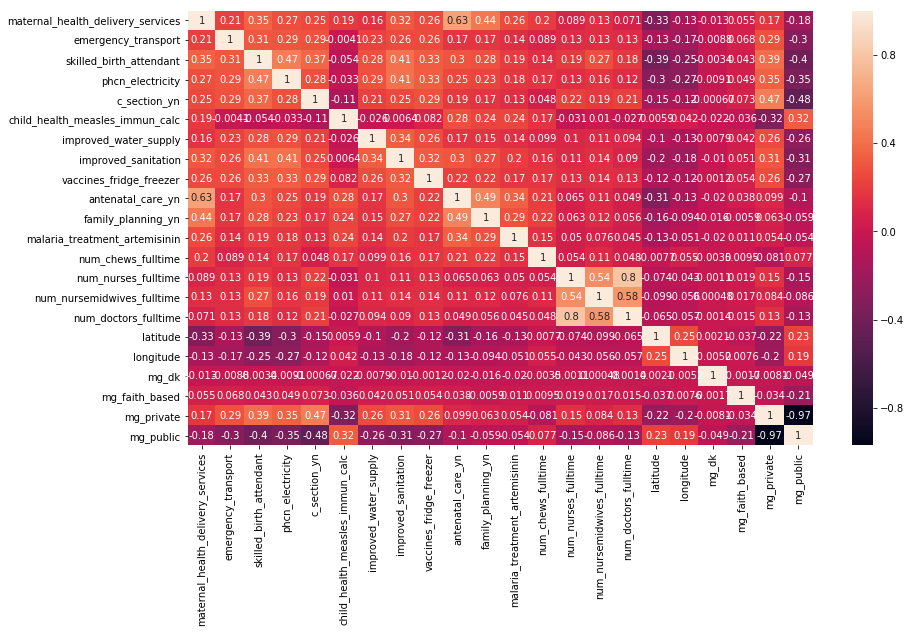

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True)
plt.savefig('maternalHealth\correlation.png')

In [14]:
# sns.jointplot(x='',y='',data=df,color='purple',kind='kde');

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
df.columns

Index(['maternal_health_delivery_services', 'facility_type_display',
       'emergency_transport', 'skilled_birth_attendant', 'phcn_electricity',
       'c_section_yn', 'child_health_measles_immun_calc',
       'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'num_chews_fulltime',
       'num_nurses_fulltime', 'num_nursemidwives_fulltime',
       'num_doctors_fulltime', 'latitude', 'longitude', 'mg_dk',
       'mg_faith_based', 'mg_private', 'mg_public'],
      dtype='object')

In [195]:
X = df[['emergency_transport', 'skilled_birth_attendant', 'phcn_electricity',
       'c_section_yn', 'child_health_measles_immun_calc',
       'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'num_chews_fulltime','num_nursemidwives_fulltime','mg_private','mg_public']]
y = df['maternal_health_delivery_services']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [221]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
from sklearn.metrics import confusion_matrix,classification_report

In [223]:
predictions = lr.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score

In [225]:
confusion_matrix(y_test,predictions)

array([[1430,  715],
       [ 188, 3014]], dtype=int64)

In [227]:
print(classification_report(y_test,predictions,))

             precision    recall  f1-score   support

          0       0.88      0.67      0.76      2145
          1       0.81      0.94      0.87      3202

avg / total       0.84      0.83      0.83      5347



In [228]:
accuracy_score(y_test,predictions)*100

83.11202543482327